# Medical Report Data Analysis

This notebook provides exploratory data analysis (EDA) for medical report measurements.

## Objectives:
1. Load and explore extracted medical report data
2. Visualize measurement distributions
3. Analyze correlations between parameters
4. Identify outliers and data quality issues
5. Compare measurements against normal ranges

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 1. Load Data

In [2]:
# Load processed JSON data
data_dir = '../data/processed/'

# Check if consolidated file exists
consolidated_file = os.path.join(data_dir, 'all_reports.json')

if os.path.exists(consolidated_file):
    with open(consolidated_file, 'r') as f:
        data = json.load(f)
    print(f"✓ Loaded {len(data)} reports from {consolidated_file}")
else:
    print("⚠ No consolidated data file found. Creating sample data...")
    # Create sample data for demonstration
    np.random.seed(42)
    data = []
    for i in range(50):
        report = {
            'file_name': f'report_{i+1}.pdf',
            'patient': {
                'age': np.random.randint(25, 80),
                'sex': np.random.choice(['M', 'F'])
            },
            'measurements': {
                'EF': np.clip(np.random.normal(60, 10), 20, 80),
                'LVID_D': np.clip(np.random.normal(4.8, 0.6), 3.5, 7.0),
                'LVID_S': np.clip(np.random.normal(3.2, 0.5), 2.0, 5.0),
                'IVS_D': np.clip(np.random.normal(0.9, 0.2), 0.6, 1.6),
                'LVPW_D': np.clip(np.random.normal(0.9, 0.2), 0.6, 1.5),
                'LA_DIMENSION': np.clip(np.random.normal(3.8, 0.5), 2.5, 5.5),
                'MV_E_A': np.clip(np.random.normal(1.2, 0.4), 0.5, 2.5)
            }
        }
        data.append(report)
    print(f"✓ Generated {len(data)} sample reports")

⚠ No consolidated data file found. Creating sample data...
✓ Generated 50 sample reports


In [15]:
# Convert to DataFrame
rows = []
for report in data:
    row = {
        'file_name': report.get('file_name', ''),
        'age': report.get('patient', {}).get('age'),
        'sex': report.get('patient', {}).get('sex'),
        **report.get('measurements', {})
    }
    rows.append(row)

df = pd.DataFrame(rows)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (50, 10)

Columns: ['file_name', 'age', 'sex', 'EF', 'LVID_D', 'LVID_S', 'IVS_D', 'LVPW_D', 'LA_DIMENSION', 'MV_E_A']

First few rows:


,file_name,age,sex,EF,LVID_D,LVID_S,IVS_D,LVPW_D,LA_DIMENSION,MV_E_A
0,report_1.pdf,63,F,48.881199,4.991341,3.339521,1.102103,0.783824,3.537415,0.971448
1,report_2.pdf,46,M,50.759172,3.765049,2.918856,0.697434,0.962849,3.345988,0.635079
2,report_3.pdf,71,F,60.675282,3.945151,2.927809,0.922185,0.669801,3.987849,0.959745
3,report_4.pdf,44,F,57.083063,4.187069,3.119122,0.793270,0.898894,3.685275,1.355740
4,report_5.pdf,64,F,62.088636,3.624198,2.535907,0.939372,1.047693,3.885684,1.153741


## 2. Data Quality Assessment

In [16]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*60)
print("Data Types:")
print(df.dtypes)

print("\n" + "="*60)
print("Basic Statistics:")
df.describe()

Missing Values:
file_name       0
age             0
sex             0
EF              0
LVID_D          0
LVID_S          0
IVS_D           0
LVPW_D          0
LA_DIMENSION    0
MV_E_A          0
dtype: int64

Data Types:
file_name        object
age               int64
sex              object
EF              float64
LVID_D          float64
LVID_S          float64
IVS_D           float64
LVPW_D          float64
LA_DIMENSION    float64
MV_E_A          float64
dtype: object

Basic Statistics:


,age,EF,LVID_D,LVID_S,IVS_D,LVPW_D,LA_DIMENSION,MV_E_A
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,52.520000,61.767687,4.776214,3.145232,0.863482,0.923704,3.657926,1.196370
std,16.857433,9.031977,0.631140,0.520561,0.202248,0.207148,0.470818,0.397051
min,25.000000,42.894704,3.624198,2.204231,0.600000,0.600000,2.500000,0.500000
25%,40.750000,54.353757,4.424509,2.769843,0.698549,0.784553,3.366731,0.957124
50%,50.500000,63.507285,4.833480,3.161438,0.860165,0.895865,3.658092,1.209887
75%,66.750000,67.997202,5.256778,3.443756,0.970809,1.027087,4.047391,1.503540
max,79.000000,80.000000,5.888200,4.295228,1.354669,1.500000,4.582322,2.139199


## 3. Distribution Analysis

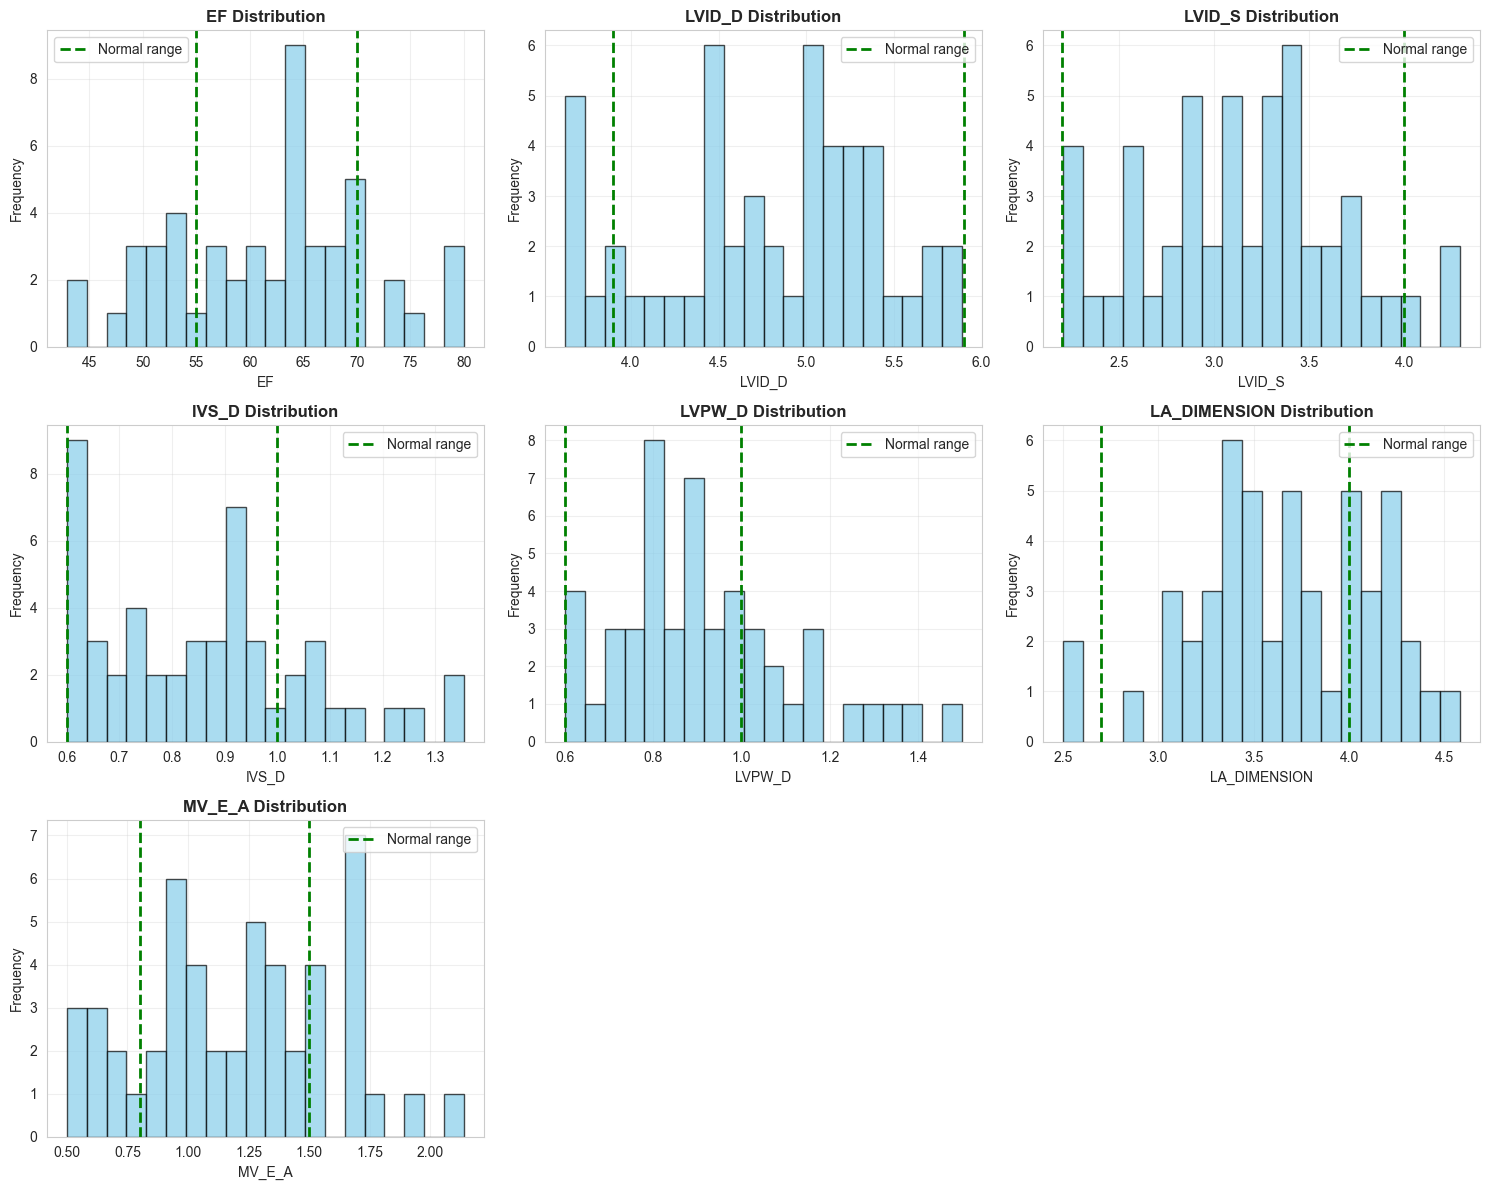

In [17]:
# Define normal ranges for reference
normal_ranges = {
    'EF': (55, 70),
    'LVID_D': (3.9, 5.9),
    'LVID_S': (2.2, 4.0),
    'IVS_D': (0.6, 1.0),
    'LVPW_D': (0.6, 1.0),
    'LA_DIMENSION': (2.7, 4.0),
    'MV_E_A': (0.8, 1.5)
}

# Select numeric columns for measurements
measurement_cols = [col for col in df.columns if col not in ['file_name', 'age', 'sex']]

# Create distribution plots
n_cols = 3
n_rows = (len(measurement_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(measurement_cols):
    if col in df.columns and df[col].notna().any():
        ax = axes[idx]
        
        # Plot histogram
        ax.hist(df[col].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Add normal range lines if available
        if col in normal_ranges:
            lower, upper = normal_ranges[col]
            ax.axvline(lower, color='green', linestyle='--', linewidth=2, label='Normal range')
            ax.axvline(upper, color='green', linestyle='--', linewidth=2)
        
        ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(measurement_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 4. Normal vs Abnormal Classification

In [18]:
# Classify measurements as normal/abnormal
def classify_measurement(value, param_name):
    if pd.isna(value) or param_name not in normal_ranges:
        return 'Unknown'
    
    lower, upper = normal_ranges[param_name]
    if lower <= value <= upper:
        return 'Normal'
    else:
        return 'Abnormal'

# Apply classification
for col in measurement_cols:
    if col in df.columns and col in normal_ranges:
        df[f'{col}_status'] = df[col].apply(lambda x: classify_measurement(x, col))

# Count normal vs abnormal
print("Classification Summary:\n")
for col in measurement_cols:
    status_col = f'{col}_status'
    if status_col in df.columns:
        counts = df[status_col].value_counts()
        print(f"{col}:")
        print(f"  Normal: {counts.get('Normal', 0)} ({counts.get('Normal', 0)/len(df)*100:.1f}%)")
        print(f"  Abnormal: {counts.get('Abnormal', 0)} ({counts.get('Abnormal', 0)/len(df)*100:.1f}%)")
        print()

Classification Summary:

EF:
  Normal: 30 (60.0%)
  Abnormal: 20 (40.0%)

LVID_D:
  Normal: 44 (88.0%)
  Abnormal: 6 (12.0%)

LVID_S:
  Normal: 47 (94.0%)
  Abnormal: 3 (6.0%)

IVS_D:
  Normal: 39 (78.0%)
  Abnormal: 11 (22.0%)

LVPW_D:
  Normal: 36 (72.0%)
  Abnormal: 14 (28.0%)

LA_DIMENSION:
  Normal: 33 (66.0%)
  Abnormal: 17 (34.0%)

MV_E_A:
  Normal: 28 (56.0%)
  Abnormal: 22 (44.0%)



## 5. Correlation Analysis

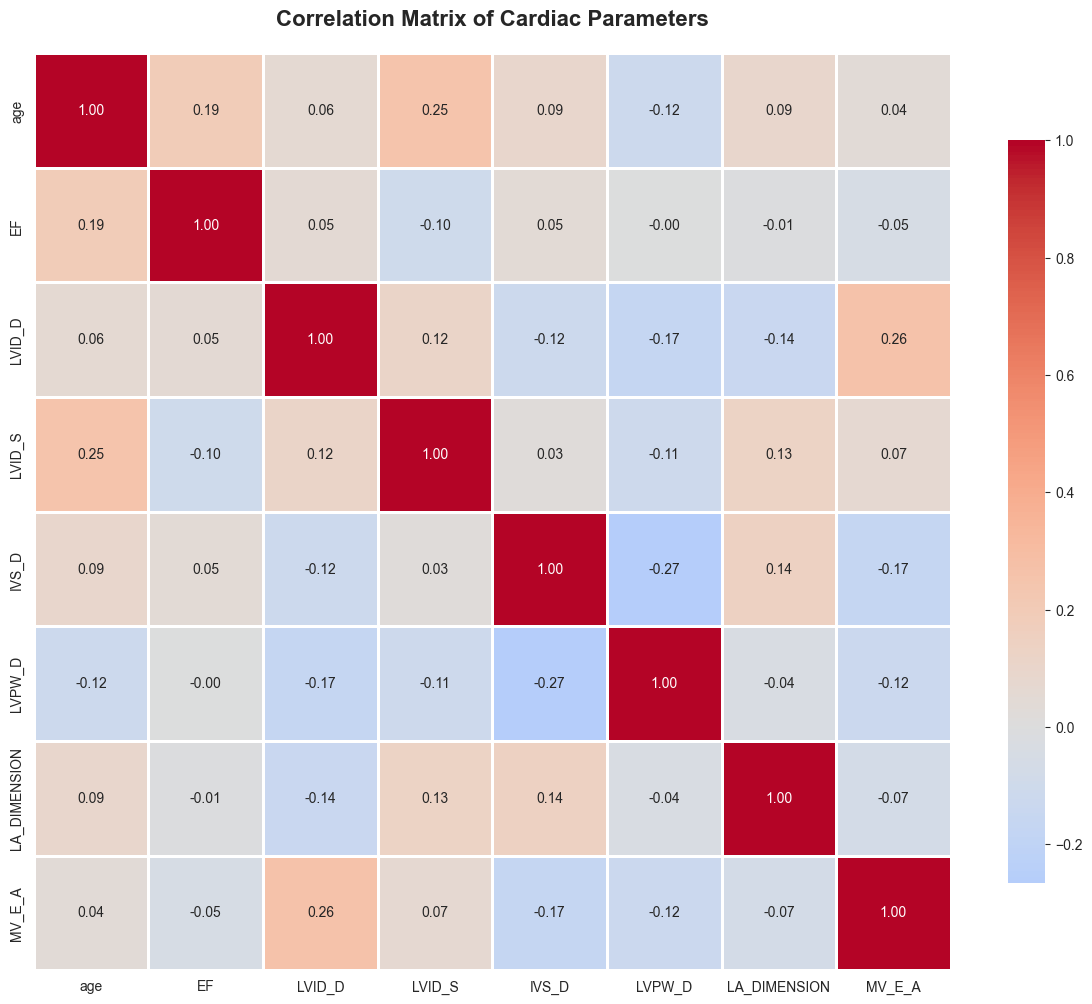


Strong Correlations (|r| > 0.7):



In [7]:
# Compute correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Cardiac Parameters', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.7):\n")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## 6. Age and Sex Analysis

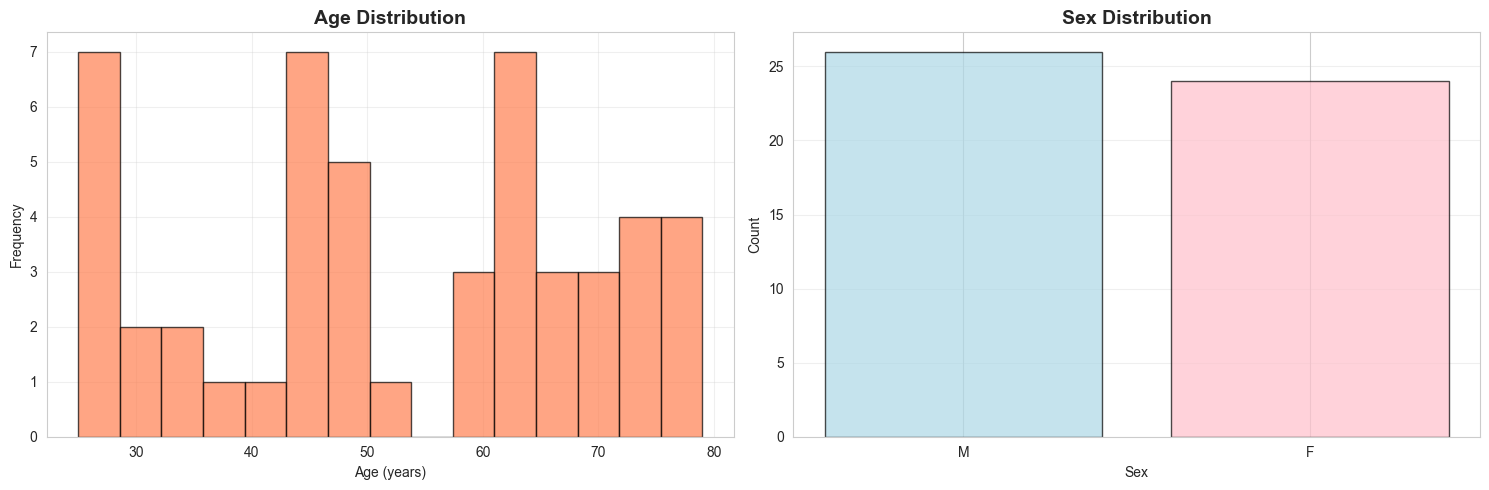


Age Statistics:
  Mean: 52.5 years
  Median: 50.5 years
  Range: 25 - 79 years

Sex Distribution:
sex
M    26
F    24
Name: count, dtype: int64


In [19]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Age histogram
axes[0].hist(df['age'].dropna(), bins=15, alpha=0.7, color='coral', edgecolor='black')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Sex distribution
sex_counts = df['sex'].value_counts()
axes[1].bar(sex_counts.index, sex_counts.values, alpha=0.7, color=['lightblue', 'pink'], edgecolor='black')
axes[1].set_title('Sex Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nAge Statistics:")
print(f"  Mean: {df['age'].mean():.1f} years")
print(f"  Median: {df['age'].median():.1f} years")
print(f"  Range: {df['age'].min():.0f} - {df['age'].max():.0f} years")

print(f"\nSex Distribution:")
print(sex_counts)

## 7. Box Plots - Outlier Detection

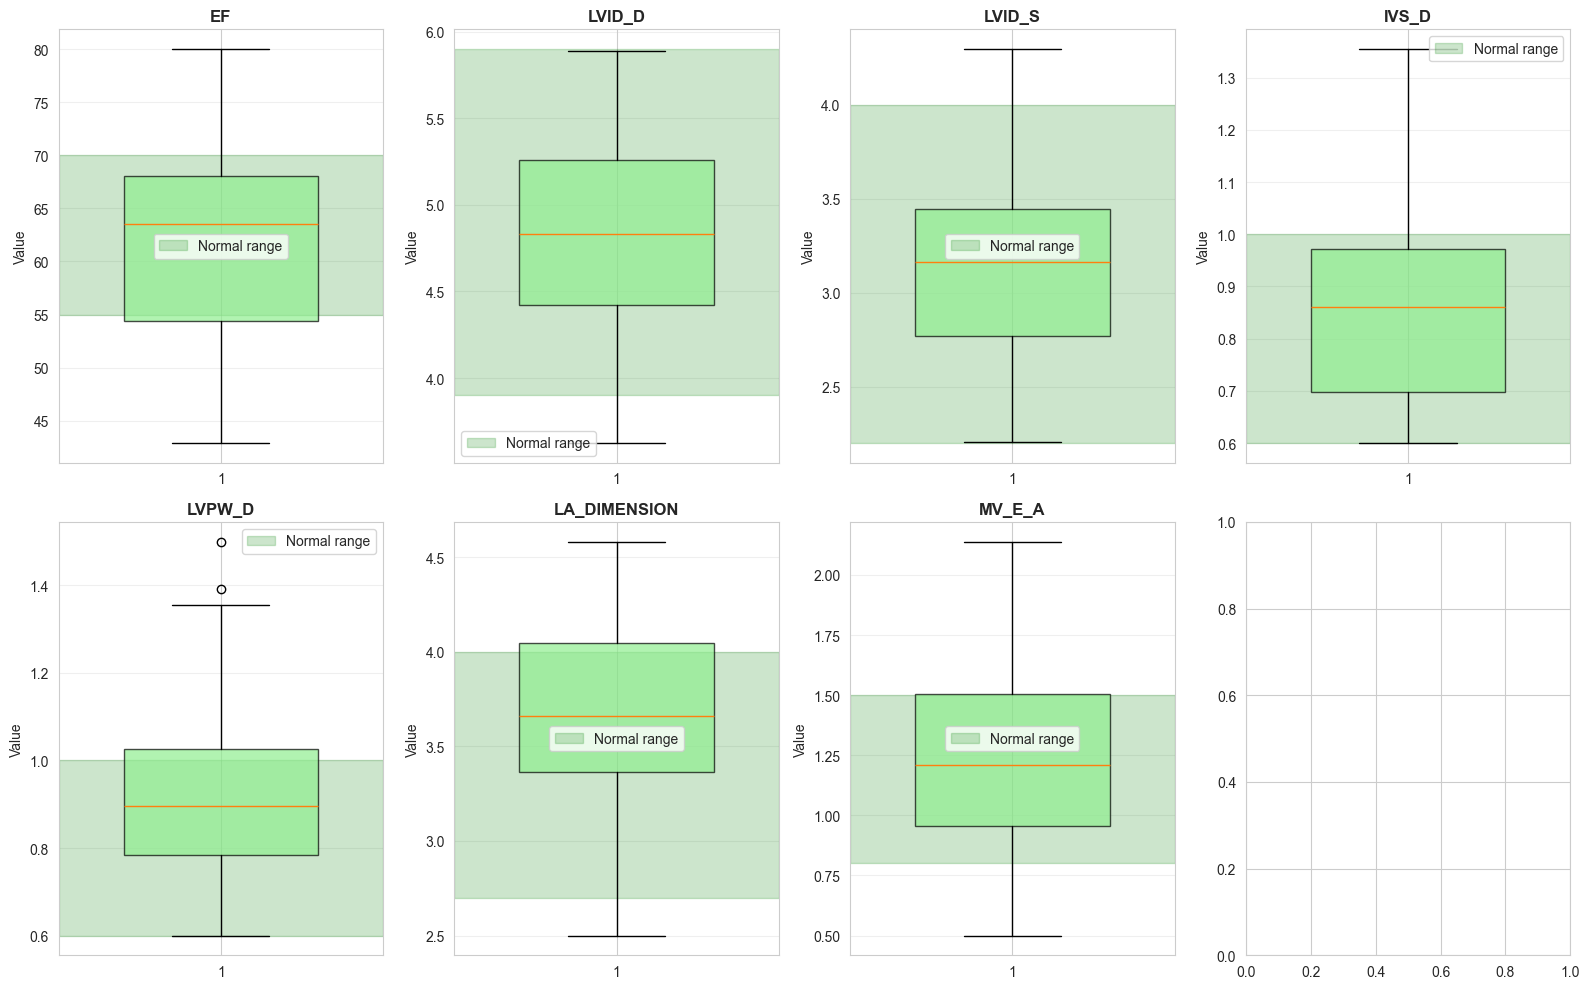

In [9]:
# Create box plots for all measurements
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(measurement_cols[:8]):
    if col in df.columns and df[col].notna().any():
        ax = axes[idx]
        
        # Box plot
        bp = ax.boxplot([df[col].dropna()], patch_artist=True, widths=0.6)
        
        # Color the box
        for patch in bp['boxes']:
            patch.set_facecolor('lightgreen')
            patch.set_alpha(0.7)
        
        # Add normal range shading if available
        if col in normal_ranges:
            lower, upper = normal_ranges[col]
            ax.axhspan(lower, upper, alpha=0.2, color='green', label='Normal range')
        
        ax.set_title(col, fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3, axis='y')
        ax.legend()

plt.tight_layout()
plt.show()

## 8. Comparison by Sex

/var/folders/c9/klb9v3l17q318mk7w15zj7wm0000gn/T/ipykernel_57780/2103435429.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([male_data, female_data], labels=['Male', 'Female'],
/var/folders/c9/klb9v3l17q318mk7w15zj7wm0000gn/T/ipykernel_57780/2103435429.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([male_data, female_data], labels=['Male', 'Female'],
/var/folders/c9/klb9v3l17q318mk7w15zj7wm0000gn/T/ipykernel_57780/2103435429.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([male_data, female_data], labels=['Male', 'Female'],
/var/folders/c9/klb9v3l17q318mk

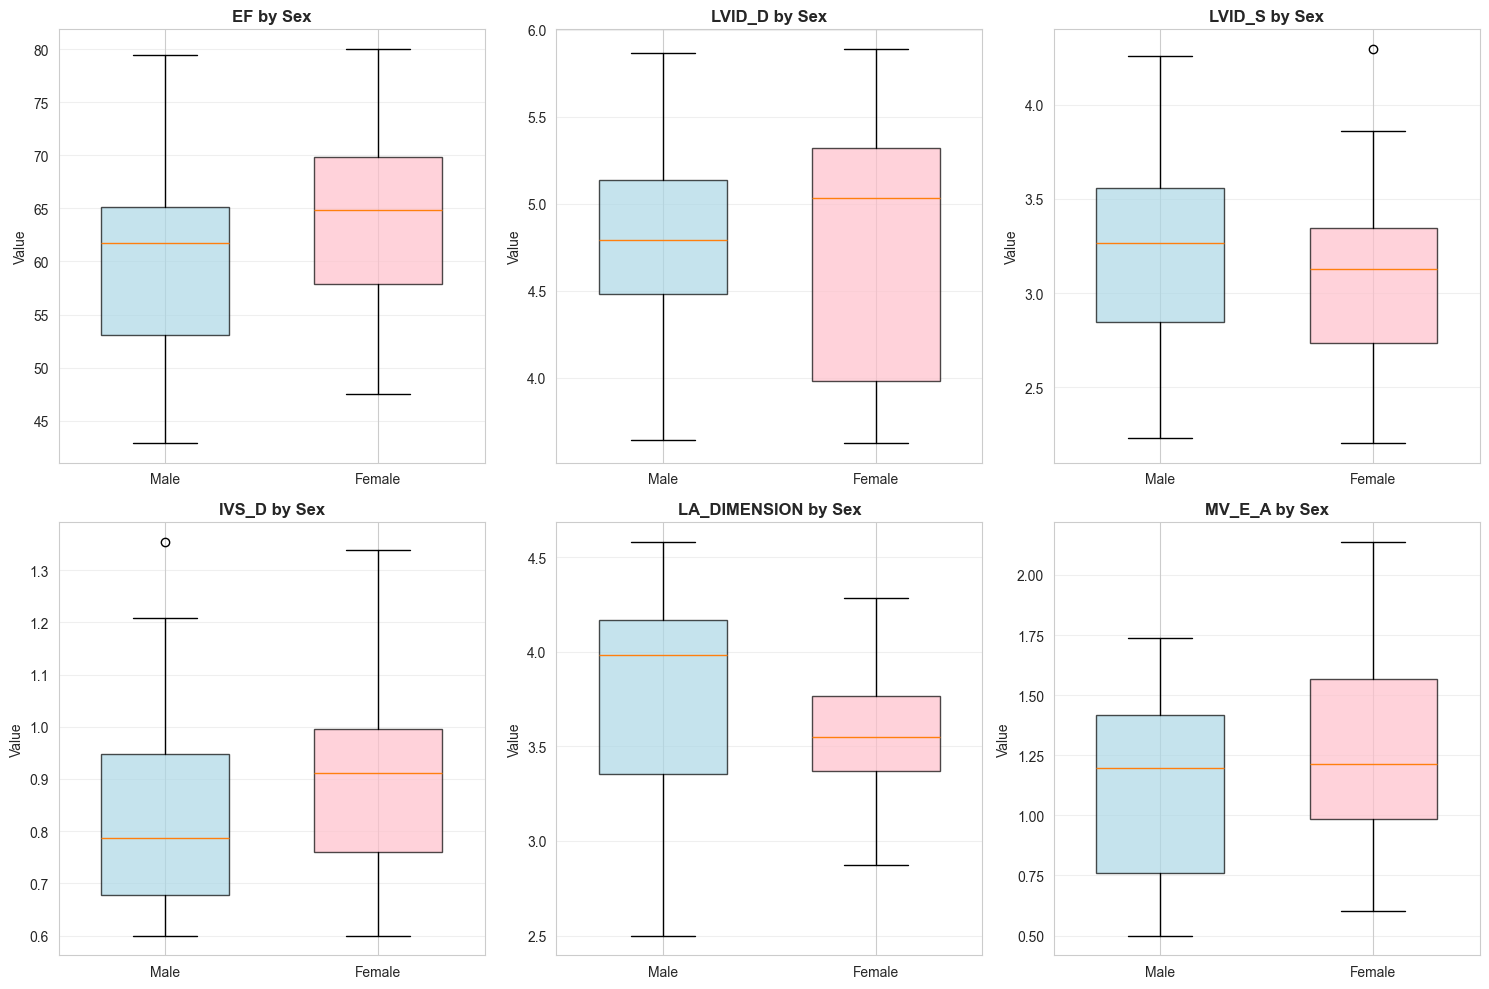

In [11]:
# Compare measurements between male and female
if 'sex' in df.columns and df['sex'].notna().any():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    key_params = ['EF', 'LVID_D', 'LVID_S', 'IVS_D', 'LA_DIMENSION', 'MV_E_A']
    
    for idx, param in enumerate(key_params):
        if param in df.columns:
            ax = axes[idx]
            
            # Separate data by sex
            male_data = df[df['sex'] == 'M'][param].dropna()
            female_data = df[df['sex'] == 'F'][param].dropna()
            
            # Box plot comparison
            bp = ax.boxplot([male_data, female_data], labels=['Male', 'Female'], 
                           patch_artist=True, widths=0.6)
            
            # Color boxes
            colors = ['lightblue', 'pink']
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax.set_title(f'{param} by Sex', fontsize=12, fontweight='bold')
            ax.set_ylabel('Value')
            ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
else:
    print("Sex data not available for comparison")

## 9. Summary Report

In [10]:
print("="*60)
print("MEDICAL REPORT DATA ANALYSIS SUMMARY")
print("="*60)

print(f"\nTotal Reports Analyzed: {len(df)}")
print(f"Total Measurements: {len(measurement_cols)}")

print("\n" + "-"*60)
print("Patient Demographics:")
print("-"*60)
print(f"Age Range: {df['age'].min():.0f} - {df['age'].max():.0f} years")
print(f"Mean Age: {df['age'].mean():.1f} ± {df['age'].std():.1f} years")
if 'sex' in df.columns:
    print(f"Male: {(df['sex'] == 'M').sum()} ({(df['sex'] == 'M').sum()/len(df)*100:.1f}%)")
    print(f"Female: {(df['sex'] == 'F').sum()} ({(df['sex'] == 'F').sum()/len(df)*100:.1f}%)")

print("\n" + "-"*60)
print("Key Findings:")
print("-"*60)

# Calculate percentage of abnormal findings
for col in ['EF', 'LVID_D', 'LA_DIMENSION']:
    status_col = f'{col}_status'
    if status_col in df.columns:
        abnormal_pct = (df[status_col] == 'Abnormal').sum() / len(df) * 100
        print(f"{col}: {abnormal_pct:.1f}% abnormal findings")

print("\n" + "="*60)
print("Analysis Complete!")
print("="*60)

MEDICAL REPORT DATA ANALYSIS SUMMARY

Total Reports Analyzed: 50
Total Measurements: 7

------------------------------------------------------------
Patient Demographics:
------------------------------------------------------------
Age Range: 25 - 79 years
Mean Age: 52.5 ± 16.9 years
Male: 26 (52.0%)
Female: 24 (48.0%)

------------------------------------------------------------
Key Findings:
------------------------------------------------------------
EF: 40.0% abnormal findings
LVID_D: 12.0% abnormal findings
LA_DIMENSION: 34.0% abnormal findings

Analysis Complete!
